In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("framingham.csv", index_col=False)

In [3]:
#about 650 rows in total have missing values >10% impute with mean for totChol, BMI, glucose and mode for education, cigsPerDay, BP meds
df['totChol'].fillna(df['totChol'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['glucose'].fillna(df['glucose'].mean(), inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].mode()[0], inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)

In [4]:
#remove 1 row with missing values for heart rate
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [12]:
#count number of outliers
#totChol
q1 = df['totChol'].quantile(0.25)
q3 = df['totChol'].quantile(0.75)
iqr = q3-q1
print(iqr)
lb=df['totChol'].quantile(0.25) - (1.5 * iqr)
ub=df['totChol'].quantile(0.75) + (1.5 * iqr)
# count totChol beyond lb and ub
print(df[df['totChol'] < lb].shape[0] + df[df['totChol'] > ub].shape[0])

56.0
57


In [13]:
#impute lb values to less than lb and ub values to greater than ub
df.loc[df['totChol'] < lb, 'totChol'] = lb
df.loc[df['totChol'] > ub, 'totChol'] = ub
#'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'

In [14]:
#count number of outliers
#sysBP
q1 = df['sysBP'].quantile(0.25)
q3 = df['sysBP'].quantile(0.75)
iqr = q3-q1
print(iqr)
lb=df['sysBP'].quantile(0.25) - (1.5 * iqr)
ub=df['sysBP'].quantile(0.75) + (1.5 * iqr)
# count sysBP beyond lb and ub
print(df[df['sysBP'] < lb].shape[0] + df[df['sysBP'] > ub].shape[0])

27.0
126


In [15]:
#impute lb values to less than lb and ub values to greater than ub
df.loc[df['sysBP'] < lb, 'sysBP'] = lb
df.loc[df['sysBP'] > ub, 'sysBP'] = ub


In [16]:
#count number of outliers
#diaBP
q1 = df['diaBP'].quantile(0.25)
q3 = df['diaBP'].quantile(0.75)
iqr = q3-q1
print(iqr)
lb=df['diaBP'].quantile(0.25) - (1.5 * iqr)
ub=df['diaBP'].quantile(0.75) + (1.5 * iqr)
# count diaBP beyond lb and ub
print(df[df['diaBP'] < lb].shape[0] + df[df['diaBP'] > ub].shape[0])


15.0
77


In [17]:
#impute lb values to less than lb and ub values to greater than ub
df.loc[df['diaBP'] < lb, 'diaBP'] = lb
df.loc[df['diaBP'] > ub, 'diaBP'] = ub

In [18]:
#count number of outliers
#BMI
q1 = df['BMI'].quantile(0.25)
q3 = df['BMI'].quantile(0.75)
iqr = q3-q1
print(iqr)
lb=df['BMI'].quantile(0.25) - (1.5 * iqr)
ub=df['BMI'].quantile(0.75) + (1.5 * iqr)
# count BMI beyond lb and ub
print(df[df['BMI'] < lb].shape[0] + df[df['BMI'] > ub].shape[0])


4.950000000000003
97


In [19]:
#impute lb values to less than lb and ub values to greater than ub
df.loc[df['BMI'] < lb, 'BMI'] = lb
df.loc[df['BMI'] > ub, 'BMI'] = ub


In [20]:
#count number of outliers
#heartRate
q1 = df['heartRate'].quantile(0.25)
q3 = df['heartRate'].quantile(0.75)
iqr = q3-q1
print(iqr)
lb=df['heartRate'].quantile(0.25) - (1.5 * iqr)
ub=df['heartRate'].quantile(0.75) + (1.5 * iqr)
# count heartRate beyond lb and ub
print(df[df['heartRate'] < lb].shape[0] + df[df['heartRate'] > ub].shape[0])

15.0
76


In [21]:
#impute lb values to less than lb and ub values to greater than ub
df.loc[df['heartRate'] < lb, 'heartRate'] = lb
df.loc[df['heartRate'] > ub, 'heartRate'] = ub


In [22]:
#count number of outliers
#glucose
q1 = df['glucose'].quantile(0.25)
q3 = df['glucose'].quantile(0.75)
iqr = q3-q1
print(iqr)
lb=df['glucose'].quantile(0.25) - (1.5 * iqr)
ub=df['glucose'].quantile(0.75) + (1.5 * iqr)
# count glucose beyond lb and ub
print(df[df['glucose'] < lb].shape[0] + df[df['glucose'] > ub].shape[0])


13.0
262


In [23]:
#impute lb values to less than lb and ub values to greater than ub
df.loc[df['glucose'] < lb, 'glucose'] = lb
df.loc[df['glucose'] > ub, 'glucose'] = ub


<AxesSubplot:>

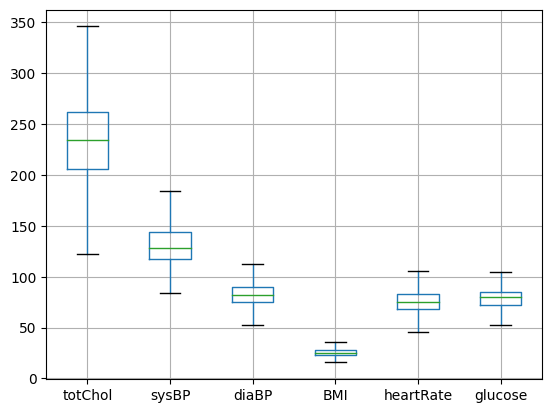

In [53]:
#outlier detection after treatment
df.boxplot(column=['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'])

In [24]:
X = df.values[:, :-1]
Y = df.values[:, -1]

In [25]:
# number of 1s and 0s in TenYearCHD
print('Number of 1s and 0s in TenYearCHD:')
print(df['TenYearCHD'].value_counts())
#imbalanced dataset

Number of 1s and 0s in TenYearCHD:
0    3594
1     643
Name: TenYearCHD, dtype: int64


In [26]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [27]:
#y resampled is now balanced
print('Number of 1s and 0s in TenYearCHD after resampling:')
print(pd.Series(Y_resampled).value_counts())

Number of 1s and 0s in TenYearCHD after resampling:
0.0    3594
1.0    3594
dtype: int64


In [28]:
object = StandardScaler()
X_std = object.fit_transform(X_resampled)

In [30]:
#split data into train and test
#import train_test_split function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, Y_resampled, test_size=0.2, random_state=42)

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = rf.predict(X_test)

from sklearn.metrics import accuracy_score

rf_accuracy = accuracy_score(y_pred, y_test)
print(f"Random Forest Validation Accuracy: {rf_accuracy:.2%}")

Random Forest Validation Accuracy: 97.22%


In [52]:
#cross validation for  Random Forest
from sklearn.model_selection import cross_val_score
rf_cv_scores = cross_val_score(rf, X_std, Y_resampled, cv=5)
print(f"Accuracy scores for the 5 folds: {rf_cv_scores}")
print(f"Mean cross-validation score: {rf_cv_scores.mean():.2%}")


Accuracy scores for the 5 folds: [0.96940195 0.97496523 0.97357441 0.98121086 0.97494781]
Mean cross-validation score: 97.48%


In [32]:
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
print(f'Precision: {precision_score(y_test, y_pred):.2f}')
print(f'Recall: {recall_score(y_test, y_pred):.2f}')
print(f'F1: {f1_score(y_test, y_pred):.2f}')
print(f'AUC: {roc_auc_score(y_test, y_pred):.2f}')

Precision: 0.95
Recall: 0.99
F1: 0.97
AUC: 0.97


In [33]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix = \n{cm}")

Confusion matrix = 
[[719  32]
 [  8 679]]


In [49]:
#gradientboostingclassifier
#accuracy score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb.fit(X_train, y_train)

# Predict the classes of the validation set
y_pred = gb.predict(X_test)

gb_accuracy = accuracy_score(y_pred, y_test)
print(f"Boosting Validation Accuracy: {gb_accuracy:.2%}")

Boosting Validation Accuracy: 71.00%


In [50]:
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
print(f'Precision: {precision_score(y_test, y_pred):.2f}')
print(f'Recall: {recall_score(y_test, y_pred):.2f}')
print(f'F1: {f1_score(y_test, y_pred):.2f}')
print(f'AUC: {roc_auc_score(y_test, y_pred):.2f}')

Precision: 0.69
Recall: 0.72
F1: 0.70
AUC: 0.71


In [51]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix = \n{cm}")


Confusion matrix = 
[[527 224]
 [193 494]]


In [42]:
#cross validation for gradient boosting
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
cgb = GradientBoostingClassifier(random_state=42)
cross_val_score(cgb, X_train, y_train, cv=5)


array([0.72956522, 0.72782609, 0.71391304, 0.71826087, 0.72521739])

In [43]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
#fitting the model
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

#accuracy score
from sklearn.metrics import accuracy_score
dt_accuracy = accuracy_score(y_pred, y_test)
print(f"Decision Tree Validation Accuracy: {dt_accuracy:.2%}")

Decision Tree Validation Accuracy: 92.00%


In [44]:
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
print(f'Precision: {precision_score(y_test, y_pred):.2f}')
print(f'Recall: {recall_score(y_test, y_pred):.2f}')
print(f'F1: {f1_score(y_test, y_pred):.2f}')
print(f'AUC: {roc_auc_score(y_test, y_pred):.2f}')

Precision: 0.86
Recall: 0.99
F1: 0.92
AUC: 0.92


In [45]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix = \n{cm}")


Confusion matrix = 
[[641 110]
 [  5 682]]


In [46]:
#svm
from sklearn.svm import SVC
svm = SVC(random_state=42)
#fitting the model
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
#accuracy score
from sklearn.metrics import accuracy_score
svm_accuracy = accuracy_score(y_pred, y_test)
print(f"SVM Validation Accuracy: {svm_accuracy:.2%}")

SVM Validation Accuracy: 72.39%


In [47]:
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
print(f'Precision: {precision_score(y_test, y_pred):.2f}')
print(f'Recall: {recall_score(y_test, y_pred):.2f}')
print(f'F1: {f1_score(y_test, y_pred):.2f}')
print(f'AUC: {roc_auc_score(y_test, y_pred):.2f}')

Precision: 0.70
Recall: 0.74
F1: 0.72
AUC: 0.72


In [48]:
#create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix = \n{cm}")


Confusion matrix = 
[[530 221]
 [176 511]]
